### Ex.1 - PMF

In [9]:
from itertools import product


vars = (sum(x) for x in product(range(1,7), repeat=9))

In [10]:
from collections import Counter
import numpy as np


counter = Counter(vars)
x = np.array(list(counter.keys()))
y = np.array(list(counter.values()))
y = y / y.sum()

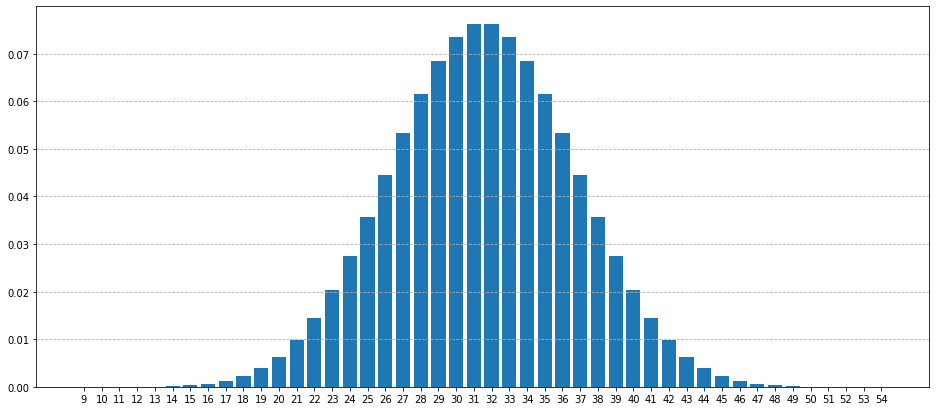

In [12]:
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(16,7))
plt.bar(x, y)
plt.xticks(x)
plt.grid(axis='y', ls='--')
plt.show()

### Ex2

In [168]:
np.random.randint(1, 7, (10, 5, 2)).sum(axis=2).mean(axis=1)

array([8. , 7. , 8.6, 8.4, 8.8, 6.2, 5.6, 7.6, 6.2, 8.6])

In [170]:
import random
import numpy as np


def run_experiment(dice=(1,6), n_dices=2, n_throws=10, n_runs=100):
    return np.random.randint(dice[0], dice[1]+1, (n_runs, n_throws, n_dices)).sum(axis=2).mean(axis=1)

In [181]:
dice=(1,6)
n_dices=2
n_throws=1000
n_runs=10000

result = run_experiment(dice, n_dices, n_throws, n_runs)

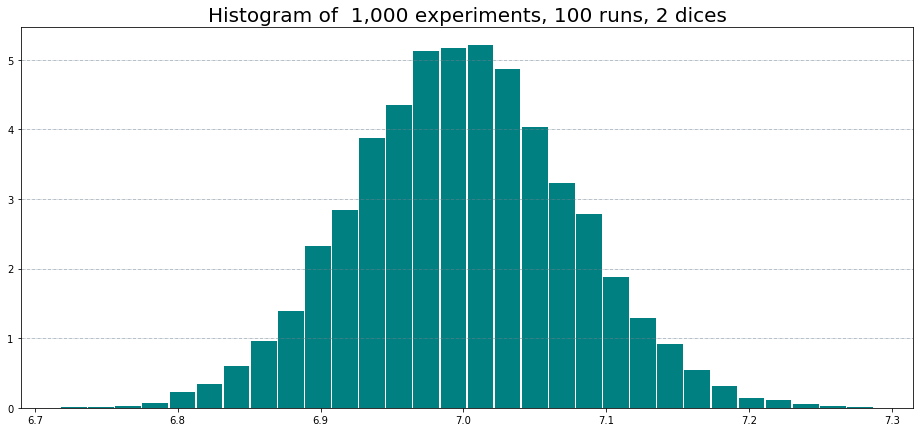

In [183]:
fig = plt.figure(figsize=(16,7))
plt.hist(result, density=True, bins=30, rwidth=0.95, color='teal')
plt.title(f"Histogram of {k: ,.0f} experiments, {n_times:,.0f} runs, {n_dices:,.0f} dices", fontdict={'size':20})
plt.grid(axis='y', ls='-.', lw=0.5, c='slategray')
plt.show()

### Distributions

- Bernoulli Distribution (y = 1 / 0, p(y) = p / 1 - p)
- Binomial Experiment

### Ex.3

In [22]:
from scipy.stats import binom
import numpy as np

In [8]:
import matplotlib.pyplot as plt

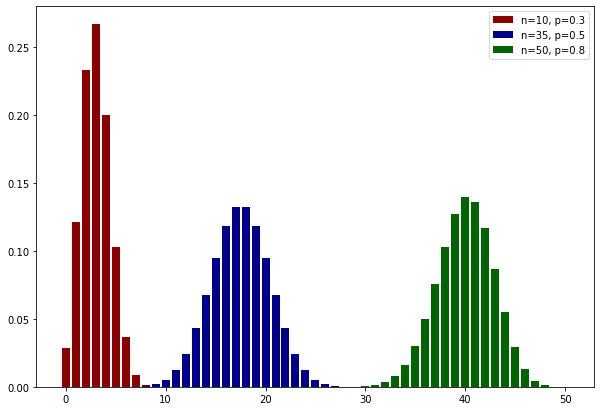

In [59]:
plt.figure(figsize=(10,7))
x = np.arange(0,51)

binom.pmf(n=10, p=0.3, k=x)

for n, p, c in ((10, 0.3, 'darkred'), (35, 0.5, 'darkblue'), (50, 0.8, 'darkgreen')):
    plt.bar(x, binom.pmf(n=n, p=p, k=x), color=c, label=f"n={n}, p={p}")
plt.legend()
plt.show()

In [66]:
binom.pmf(k=range(16,41), n=40, p=0.2).sum()

0.0029361973496301722

In [77]:
1 - binom.cdf(k=15, n=40, p=0.2)

0.002936197349630132

In [80]:
binom(40, 0.2).pmf(range(16,41)).sum()

0.0029361973496301722

### Geometric Distribution

In [81]:
import scipy

In [84]:
scipy.stats.geom(0.03).pmf(3)

0.028227

#### Negative Binomial Distribution

In [101]:
A = scipy.stats.nbinom(n=4, p=0.25, loc=4)
B = scipy.stats.nbinom(n=12, p=0.75, loc=12)
x = np.arange(0,50)

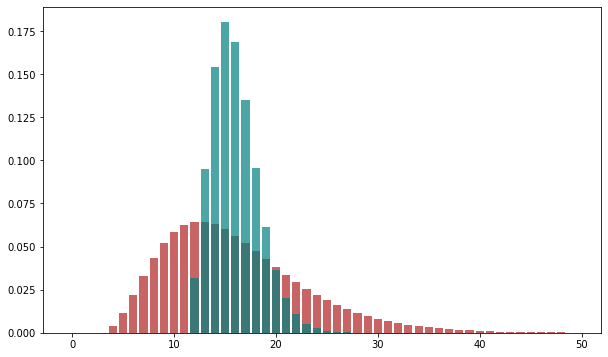

In [114]:
plt.figure(figsize=(10,6))
plt.bar(x, A.pmf(x), color='firebrick', alpha=0.7)
plt.bar(x, B.pmf(x), color='teal', alpha=0.7)

plt.show()

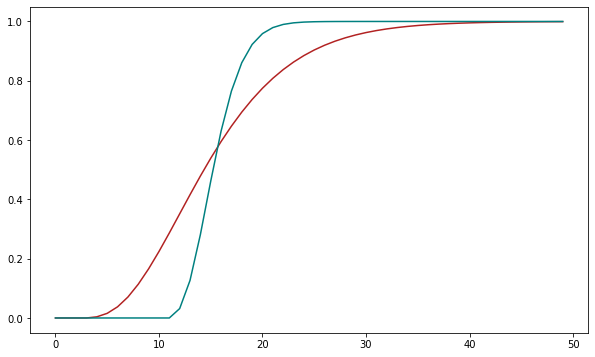

In [112]:
plt.figure(figsize=(10,b6))
plt.plot(x, A.cdf(x), color='firebrick')
plt.plot(x, B.cdf(x), color='teal')
plt.show()

### Ex. 5

In [144]:
deffect_distribution = scipy.stats.nbinom(n=1, p=0.01, loc=1) 
x = np.arange(0,300)

sum(deffect_distribution.cdf(x) < 0.75) # At least n=1 deffective part with 75% probability

137

In [166]:
def compute_min_batch(n, p, conf):
    x = np.arange(0,500)
    deffect_distribution = scipy.stats.nbinom(n=n, p=p, loc=n)
    ans = sum(deffect_distribution.cdf(x) < conf)
    
    plt.figure(figsize=(12,7))    
    plt.plot(x, deffect_distribution.cdf(x), c='firebrick')
    plt.vlines(ans, 0, 1, ls='--', colors='teal')
    plt.hlines(conf,0,500, ls='--', colors='teal')
    plt.axis([0,500,0,1])
    plt.show()
    print(ans)

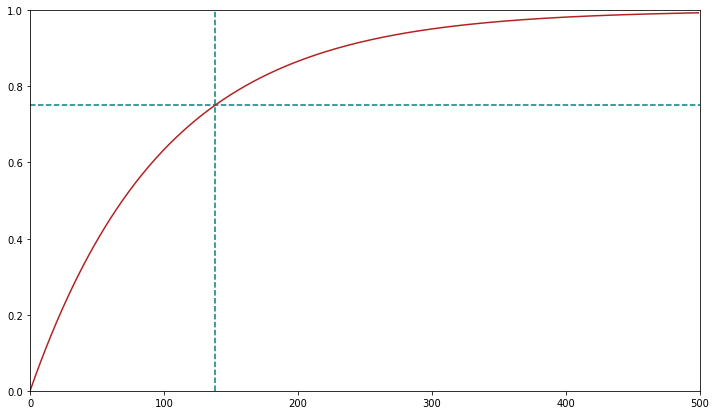

138


In [167]:
compute_min_batch(1, 0.01, 0.75)

In [171]:
C = scipy.stats.nbinom(n=1, p=0.01, loc=1)

In [173]:
C .ppf(q=0.75)

138.0

### Poisson Distribution

In [181]:
birth_prob = scipy.stats.poisson(3)

In [182]:
birth_prob.ppf(1 - 10/365)

7.0

### Ex.6

In [185]:
P1 = scipy.stats.poisson(mu=35, loc=18).rvs(size=150000)
P2 = scipy.stats.poisson(mu=10, loc=18).rvs(size=100000)

In [189]:
P1_2 = np.hstack((P1, P2))

In [194]:
sample = np.random.choice(P1_2, size=500)

In [196]:
P1_2.mean()

43.00088

In [197]:
sample.mean()

43.512

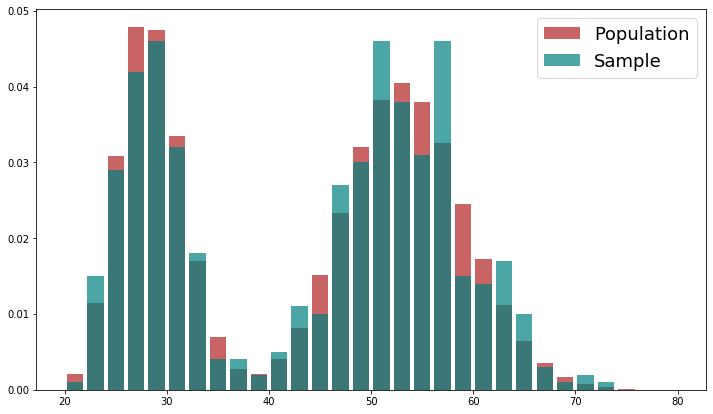

In [218]:
plt.figure(figsize=(12,7))
plt.hist(P1_2, density=True, bins=range(20, 81, 2), color='firebrick', alpha=0.7, rwidth=0.8, label='Population')
plt.hist(sample, density=True, bins=range(20, 81, 2), color='teal', alpha=0.7, rwidth=0.8, label='Sample')
plt.legend(fontsize=18)
plt.show()

### Dependent variables
### Ex.7

E(X) = 7
E(Y) = 63

COV(X,Y) = 0
BUT!!!!!!!!! NOT Independent